In [1]:
import pandas as pd
import numpy as np
import statsmodels.api as sm
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, classification_report
from sklearn import metrics
import matplotlib.pyplot as plt
plt.style.use('default')
import seaborn as sb

1. Data Collection
2. One hot encoding - Changing the categorical variables into dummies
3. Independent Dependent variable split
4. Find the correlation and draw heatmap
5. Hypothesis Testing - Finding the summary using OLS
6. Variable Inflation Factor
7. Feature Scalling (Standard Scaller)
8. Train Test Split
9. Making Prediction
10. Checking For Overfitting
11. Confusion Matrix
12. Checking accuracy - Classification report
13. AUC-ROC Graph

> 1. Data Collection

In [2]:
df = pd.read_csv("D:\PROGRAMMING\Datasets\Social_Network_Ads.csv")
df

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19,19000,0
1,15810944,Male,35,20000,0
2,15668575,Female,26,43000,0
3,15603246,Female,27,57000,0
4,15804002,Male,19,76000,0
...,...,...,...,...,...
395,15691863,Female,46,41000,1
396,15706071,Male,51,23000,1
397,15654296,Female,50,20000,1
398,15755018,Male,36,33000,0


In [3]:
# df.columns
df = pd.get_dummies(df, columns=['Gender'])
df = df.replace({True:1, False: 0})
df

,User ID,Age,EstimatedSalary,Purchased,Gender_Female,Gender_Male
0,15624510,19,19000,0,0,1
1,15810944,35,20000,0,0,1
2,15668575,26,43000,0,1,0
3,15603246,27,57000,0,1,0
4,15804002,19,76000,0,0,1
...,...,...,...,...,...,...
395,15691863,46,41000,1,1,0
396,15706071,51,23000,1,0,1
397,15654296,50,20000,1,1,0
398,15755018,36,33000,0,0,1


In [4]:
## Independent Dependent Variable Split
X = df.drop(['Purchased'], axis=1)
y = df[['Purchased']]

<Axes: >

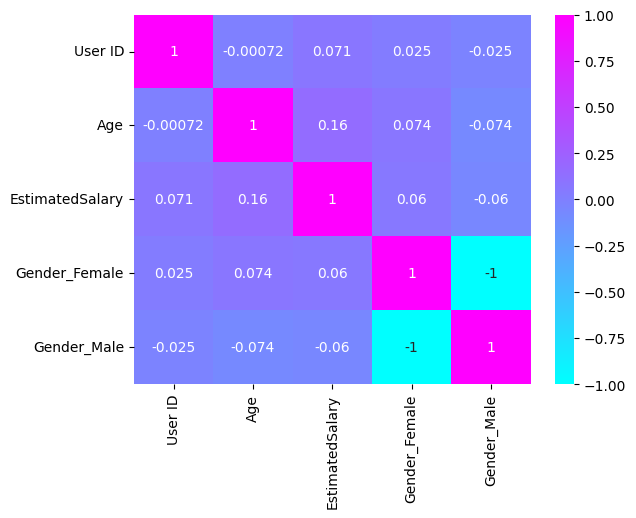

In [5]:
## Find Correlation and draw Heatmap
sb.heatmap(X.corr(), annot=True, cmap='cool')

In [6]:
## Hypothesis Testing
est = sm.Logit(y, X).fit()
print(est.summary2())

'''
here user_id, female and male has not impact on our target variable, as p values > 0.05
'''

Optimization terminated successfully.
         Current function value: 0.344690
         Iterations 7
                         Results: Logit
Model:              Logit            Pseudo R-squared: 0.471     
Dependent Variable: Purchased        AIC:              285.7524  
Date:               2023-07-18 23:49 BIC:              305.7097  
No. Observations:   400              Log-Likelihood:   -137.88   
Df Model:           4                LL-Null:          -260.79   
Df Residuals:       395              LLR p-value:      5.1742e-52
Converged:          1.0000           Scale:            1.0000    
No. Iterations:     7.0000                                       
-----------------------------------------------------------------
                  Coef.  Std.Err.    z    P>|z|   [0.025   0.975]
-----------------------------------------------------------------
User ID          -0.0000   0.0000 -0.3014 0.7631  -0.0000  0.0000
Age               0.2370   0.0264  8.9817 0.0000   0.1853  0.2887


'\nhere user_id, female and male has not impact on our target variable, as p values > 0.05\n'

In [7]:
est.params

User ID           -6.492306e-07
Age                2.370247e-01
EstimatedSalary    3.651926e-05
Gender_Female     -2.598983e+00
Gender_Male       -2.277254e+00
dtype: float64

In [8]:
## Variable inflation Factor

def find_vif(xx):
    vif = pd.DataFrame()
    vif['Variable'] = xx.columns
    vif["VIF"] = [variance_inflation_factor(xx.values, i) for i in range(xx.shape[1])]
    return vif
xx = X
find_vif(xx)

#'''
#Here Gender_Female and Gender_Male are Highly correlated variable, so There is multicollinearity
#'''

,Variable,VIF
0,User ID,1.005705
1,Age,1.029261
2,EstimatedSalary,1.032428
3,Gender_Female,24647.974979
4,Gender_Male,23671.292518


In [9]:
## Removing One of the variable
xx = X.drop(['Gender_Male'], axis=1)
find_vif(xx)


,Variable,VIF
0,User ID,16.688407
1,Age,14.331499
2,EstimatedSalary,5.340526
3,Gender_Female,2.057321


In [10]:
'''
Hence we cannot remove any of these variables, only two variables which has impact on target
variable are Age and Salary, so I am going to include only these two variables in my model
'''
X = X[['Age', 'EstimatedSalary']]


In [11]:
## Feature Scalling
scale = StandardScaler()
X_Scaled = scale.fit_transform(X)
X_Scaled = pd.DataFrame(X_Scaled, columns=X.columns)
X_Scaled

,Age,EstimatedSalary
0,-1.781797,-1.490046
1,-0.253587,-1.460681
2,-1.113206,-0.785290
3,-1.017692,-0.374182
4,-1.781797,0.183751
...,...,...
395,0.797057,-0.844019
396,1.274623,-1.372587
397,1.179110,-1.460681
398,-0.158074,-1.078938


In [12]:
## Train Test Splitting
X_train, X_test, y_train, y_test = train_test_split(X_Scaled, y, test_size=0.30, random_state=1)
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(280, 2)
(120, 2)
(280, 1)
(120, 1)


In [13]:
## Model Training

logreg = LogisticRegression()
logreg.fit(X_train, y_train)

c:\Users\WIZ TECH\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\validation.py:1111: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


LogisticRegression()

In [14]:
y_predict = logreg.predict(X_test)

result = pd.DataFrame(np.c_[y_test, y_predict], columns=["Actual", "Predicted"])
result

,Actual,Predicted
0,0,0
1,0,0
2,1,1
3,1,1
4,0,0
...,...,...
115,0,0
116,0,0
117,0,0
118,0,0


In [15]:
## Checking for overfitting
print(logreg.score(X_train, y_train))
print(logreg.score(X_test, y_test))

## sO no change of overfitting

0.8464285714285714
0.825


In [16]:
## confusion matrix
matrix = confusion_matrix(y_test, y_predict)
matrix

array([[65,  7],
       [14, 34]], dtype=int64)

In [17]:
matrix_df = pd.DataFrame(matrix, 
                         index=['Age', 'EstimatedSalary'], 
                         columns=['Age', 'EstimatedSalary'])
matrix_df

,Age,EstimatedSalary
Age,65,7
EstimatedSalary,14,34


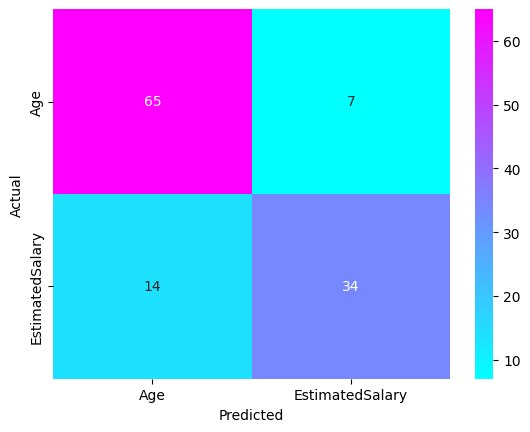

In [18]:
sb.heatmap(matrix_df, annot=True, cmap='cool')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

In [19]:
print("Accuracy of model: ", accuracy_score(y_test, y_predict)*100, '%')
print("precision_score  : ", precision_score(y_test, y_predict)*100,'%')
print("Recall_score  : ", recall_score(y_test, y_predict)*100,'%')
print("f1_score : ", f1_score(y_test, y_predict)*100, '%')

print("\nclassification_report : \n")
print(classification_report(y_test, y_predict))
print()
report = classification_report(y_test, y_predict, output_dict=True)
df_rep = pd.DataFrame(report).transpose()
df_rep

Accuracy of model:  82.5 %
precision_score  :  82.92682926829268 %
Recall_score  :  70.83333333333334 %
f1_score :  76.40449438202246 %

classification_report : 

              precision    recall  f1-score   support

           0       0.82      0.90      0.86        72
           1       0.83      0.71      0.76        48

    accuracy                           0.82       120
   macro avg       0.83      0.81      0.81       120
weighted avg       0.83      0.82      0.82       120




,precision,recall,f1-score,support
0,0.822785,0.902778,0.860927,72.000
1,0.829268,0.708333,0.764045,48.000
accuracy,0.825000,0.825000,0.825000,0.825
macro avg,0.826027,0.805556,0.812486,120.000
weighted avg,0.825378,0.825000,0.822174,120.000


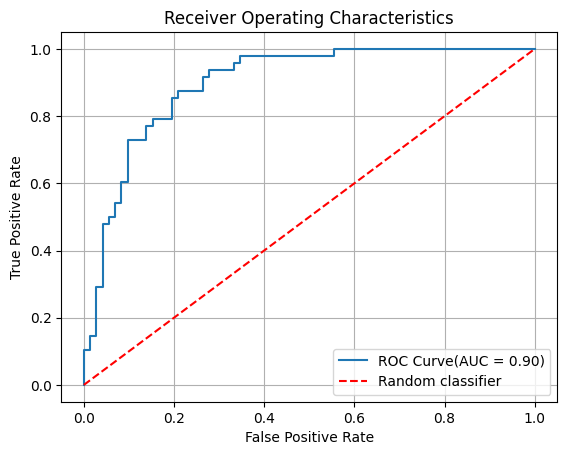

In [20]:
y_pred_prob = logreg.predict_proba(X_test)[:, 1]
fpr, tpr, _ = metrics.roc_curve(y_test, y_pred_prob)
auc = metrics.roc_auc_score(y_test, y_pred_prob)

plt.plot(fpr, tpr, label = "ROC Curve(AUC = %0.2f)"%auc)
plt.plot([0, 1], [0, 1], 'r--', label = "Random classifier")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.legend(loc = "lower right")
plt.title("Receiver Operating Characteristics")
plt.grid()
plt.show()